## 数据收集

In [1]:
import requests
import os
import pandas as pd
import json
import re
import numpy as np
from pprint import pprint

In [ ]:
#Download image-predictions.tsv via requests
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' #file addr
response = requests.get(url, stream=True)   
handle = open('image-predictions.tsv', "wb")
for chunk in response.iter_content(chunk_size=512):
    if chunk:  # filter out keep-alive new chunks
        handle.write(chunk)

In [ ]:
#get more message via tweepy API
#all key have been replace by *，if you want to run the code ,please input the key first
import tweepy
consumer_key = ******
consumer_secret = ******
access_token = ******
access_secret = ******
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)
df=pd.read_csv('twitter-archive-enhanced.csv')
for i in df.tweet_id:                                
    try:
        tweet=api.get_status(i,tweet_mode='extended')
    except Exception as e:                          
        print(e)
    with open('twet_json.txt','a') as file:
        json.dumps(tweet._json)
        file.write('\n')

In [2]:
#create a dataframe
tweet_favourite_retweet=[]
with open('tweet_json.txt','r') as json_file:    #loads the json file
    for i in json_file:
        twee=json.loads(i)
        tweet_id=twee['id']
        favourite=twee['favorite_count']
        retweet=twee['retweet_count']
        tweet_favourite_retweet.append({'tweet_id':int(tweet_id),
                                       'favourite_count':int(favourite),
                                       'retweet_count':int(retweet)})
df = pd.DataFrame(tweet_favourite_retweet, columns = ['tweet_id', 'favourite_count', 'retweet_count'])
df.to_csv('tweet_favourite_retweet.csv',index=False) #save dataframe to csv file parameter=‘index=False’ no need to save index

## 数据评估

In [3]:
# read twitter-archive-enhanced.csv
twitter=pd.read_csv('twitter-archive-enhanced.csv')
image_pre=pd.read_csv('image-predictions.tsv',sep='\t')
tweet_favourite_retweet=pd.read_csv('tweet_favourite_retweet.csv')

### 通过可视化和编程评估

In [4]:
twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
image_pre.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
tweet_favourite_retweet.head()

,tweet_id,favourite_count,retweet_count
0,892420643555336193,39492,8842
1,892177421306343426,33786,6480
2,891815181378084864,25445,4301
3,891689557279858688,42863,8925
4,891327558926688256,41016,9721


In [7]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
image_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
tweet_favourite_retweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id           2352 non-null int64
favourite_count    2352 non-null int64
retweet_count      2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [10]:
all_columns = pd.Series(list(twitter) + list(image_pre) + list(tweet_favourite_retweet))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [11]:
list(twitter)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [12]:
twitter[twitter['tweet_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [13]:
twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
image_pre.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
tweet_favourite_retweet.describe()

,tweet_id,favourite_count,retweet_count
count,2.352000e+03,2352.000000,2352.000000
mean,7.425913e+17,8109.198980,3134.932398
std,6.846210e+16,11980.795669,5237.846296
min,6.660209e+17,0.000000,0.000000
25%,6.783949e+17,1417.000000,618.000000
50%,7.193536e+17,3596.500000,1456.500000
75%,7.991219e+17,10118.000000,3628.750000
max,8.924206e+17,132318.000000,79116.000000


In [16]:
twitter.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
756,778650543019483137,NaN,NaN,2016-09-21 17:42:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Strider. He thinks he's a sorority girl. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778650543...,10,10,Strider,None,None,None,None
1652,683481228088049664,NaN,NaN,2016-01-03 02:53:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Banjo. He's a Peppercorn Shoop Da Whoop. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683481228...,11,10,Banjo,None,None,pupper,None
2078,670832455012716544,NaN,NaN,2015-11-29 05:11:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Amy. She is Queen Starburst. 10/10 une...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670832455...,10,10,Amy,None,None,None,None
887,759923798737051648,NaN,NaN,2016-08-01 01:28:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs... this is a Taiwanese Guide...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759923798...,10,10,None,None,None,None,None
678,789268448748703744,NaN,NaN,2016-10-21 00:53:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stella. She's happier than I will ever...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789268448...,10,10,Stella,None,None,None,None
817,770772759874076672,NaN,NaN,2016-08-30 23:58:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He's super h*ckin fluffy. T...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770772759...,11,10,Sebastian,None,None,None,None
1829,676237365392908289,NaN,NaN,2015-12-14 03:08:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Winston. He has no respect for th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676237365...,8,10,Winston,None,None,None,None
2075,670840546554966016,NaN,NaN,2015-11-29 05:43:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Colby. He's that one cool friend that get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670840546...,10,10,Colby,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2295,667119796878725120,NaN,NaN,2015-11-18 23:18:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gabe. He is a southern Baklava. Gabe h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667119796...,10,10,Gabe,None,None,None,None


In [17]:
twitter.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
Toby           7
Bailey         7
an             7
Buddy          7
Daisy          7
Oscar          6
Bella          6
Koda           6
Stanley        6
Milo           6
Leo            6
Rusty          6
Jack           6
Dave           6
Scout          6
Jax            6
Alfie          5
            ... 
Crumpet        1
Todo           1
Sully          1
Rupert         1
Kevon          1
Fabio          1
Lorelei        1
Goose          1
Einstein       1
Timofy         1
Hero           1
Hector         1
Dale           1
Brockly        1
Rambo          1
Buckley        1
Mutt           1
Rhino          1
Malikai        1
Kellogg        1
Katie          1
Grady          1
Tayzie         1
Goliath        1
Dewey          1
Durg           1
all            1
Ralphé        

In [18]:
twitter[twitter.name=='an']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
1025,746369468511756288,NaN,NaN,2016-06-24 15:48:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746369468...,9,10,an,None,None,None,None
1362,703041949650034688,NaN,NaN,2016-02-26 02:20:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an East African Chalupa Seal. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
2204,668636665813057536,NaN,NaN,2015-11-23 03:46:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Irish Rigatoni terrier named Berta....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668636665...,10,10,an,None,None,None,None
2333,666337882303524864,NaN,NaN,2015-11-16 19:31:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666337882...,9,10,an,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None


In [19]:
twitter[twitter.name.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [20]:
type(twitter.timestamp[0])

str

In [21]:
image_pre.sample(25)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
265,670803562457407488,https://pbs.twimg.com/media/CU8sSAvXIAAB1Py.jpg,1,basenji,0.344101,True,Ibizan_hound,0.210282,True,toy_terrier,0.196279,True
302,671504605491109889,https://pbs.twimg.com/media/CVGp4LKWoAAoD03.jpg,1,toy_poodle,0.259115,True,bath_towel,0.177669,False,Maltese_dog,0.071712,True
1227,745314880350101504,https://pbs.twimg.com/media/Clfj6RYWMAAFAOW.jpg,2,ice_bear,0.807762,False,great_white_shark,0.027040,False,fountain,0.022052,False
312,671547767500775424,https://pbs.twimg.com/media/CVHRIiqWEAAj98K.jpg,2,Loafer,0.255088,False,platypus,0.090019,False,cowboy_boot,0.066536,False
1064,715360349751484417,https://pbs.twimg.com/media/Ce14cOvWwAAcFJH.jpg,1,nail,0.855552,False,screw,0.073277,False,padlock,0.023970,False
455,674767892831932416,https://pbs.twimg.com/media/CV1B0WkWwAEBKVx.jpg,1,shower_curtain,0.238855,False,sarong,0.092414,False,kimono,0.056412,False
712,685321586178670592,https://pbs.twimg.com/media/CYLAWFMWMAEcRzb.jpg,1,Boston_bull,0.972483,True,French_bulldog,0.025469,True,boxer,0.000458,True
229,670403879788544000,https://pbs.twimg.com/media/CU3AxW1WoAA3_35.jpg,1,pug,0.802223,True,French_bulldog,0.172557,True,bull_mastiff,0.007163,True
1575,796031486298386433,https://pbs.twimg.com/media/CwwSaWJWIAASuoY.jpg,1,golden_retriever,0.893775,True,Labrador_retriever,0.070140,True,doormat,0.008419,False
614,680161097740095489,https://pbs.twimg.com/media/CXBq6RPWkAAaNuU.jpg,1,bluetick,0.268681,True,miniature_pinscher,0.125652,True,English_setter,0.089373,True


In [22]:
image_pre.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
web_site                      19
Cardigan                      19
Maltese_dog                   18
teddy                         18
Eskimo_dog                    18
beagle                        18
Shetland_sheepdog             18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

## 质量

### twitter
- source 含有格式字符
- 一部分狗狗status 提取错误，有多种status的狗狗
- timestamp 时间格式错误
- name 名字提取错误，有英文助词‘a’，‘an’，etc
- in_reply_to_status_id、retweeted_status_user_id、retweeted_status_id、retweeted_status_user_id 数据格式错误
- 部分rating_numerator/rating_denominator 提取错误,rating_numerator 没提取浮点数
- in_reply_to_status_id,in_reply_to_user_id,，retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,只需要原始数据，不需要转发的数据
- tweet_id列是int数据类型
### image_pre
- p1/p2/p3 名字首字母大小写没有统一
- p1_conf/p2_conf/p3_conf 数据不是百分比表示
- p1，p1_conf,p2,p2_conf,p3,p3_conf描述性不够强

## 清洁度

- rating_numerator与rating_denominator分开两列
- twitter/image_pre/tweet_favourite_retweet分开不同的表格,缺favourite_count，retweet_count
- 狗的status分开独立的列

## 数据清理

In [23]:
twitter_clean=twitter.copy()
image_pre_clean=image_pre.copy()
tweet_favourite_retweet_clean=tweet_favourite_retweet.copy()

- source 含有格式字符

### 定义
    使用正则表达式对字符串提取文本内容，把格式字符去掉(评审老师指出source里是一个超文本链接，它可以让我们点击该url去到另一个网址，这是我当初没想到的一个问题，但是发现，数据收集回来的时候，该超文本链接已经失去原来的功能，不能直接点击使用了，所以我还是提取文本内容出来，可以知道用户是用iPhone/Android还是PC来使用twitter)

### 代码

In [24]:
#定义一个对超链接提取文本内容的函数get_content
def get_content(url):
    res=r'<a .*?>(.*?)</a>'
    text=re.findall(res,url,re.S|re.M)
    return text
    

In [25]:
twitter_clean['source']=twitter_clean.source.apply(get_content)

### 测试

In [26]:
twitter_clean.source.sample(25)

1520     [Twitter for iPhone]
1041     [Twitter for iPhone]
2311     [Twitter for iPhone]
841      [Twitter for iPhone]
520      [Twitter for iPhone]
343      [Twitter for iPhone]
1702     [Twitter for iPhone]
1518     [Twitter for iPhone]
1275    [Vine - Make a Scene]
257      [Twitter for iPhone]
1628    [Vine - Make a Scene]
1759     [Twitter for iPhone]
1122     [Twitter for iPhone]
1942     [Twitter for iPhone]
2216     [Twitter for iPhone]
2309     [Twitter for iPhone]
670      [Twitter for iPhone]
1043     [Twitter for iPhone]
1336     [Twitter for iPhone]
1633     [Twitter for iPhone]
727      [Twitter for iPhone]
1670     [Twitter for iPhone]
2154     [Twitter for iPhone]
2111     [Twitter for iPhone]
1798     [Twitter for iPhone]
Name: source, dtype: object

- 一部分狗狗同时有多种status

### 定义
    筛选出有多种status的狗狗，通过查看对应text，修改正确的status，对于一条推文有两种狗狗的一小部分数据，保留不变
    

### 代码

In [27]:
twitter_clean_doggo=twitter_clean[twitter_clean.doggo!='None']
twitter_clean_doggo[['doggo','floofer','pupper','puppo']][(twitter_clean.puppo!='None')|(twitter_clean.floofer!='None')|(twitter_clean.pupper!='None')]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,doggo,floofer,pupper,puppo
191,doggo,None,None,puppo
200,doggo,floofer,None,None
460,doggo,None,pupper,None
531,doggo,None,pupper,None
565,doggo,None,pupper,None
575,doggo,None,pupper,None
705,doggo,None,pupper,None
733,doggo,None,pupper,None
778,doggo,None,pupper,None
822,doggo,None,pupper,None


In [28]:
twitter_clean.text[191]

"Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel"

In [29]:
twitter_clean['puppo'][191]='None'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
twitter_clean['text'][200]

"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"

In [31]:
twitter_clean.doggo[200]='None'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
twitter_clean.text[460]

'This is Dido. She\'s playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7'

In [33]:
twitter_clean.doggo[460]='None'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
twitter_clean.text[575]

"This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj"

In [35]:
twitter_clean.doggo[575]='None'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
twitter_clean.text[705]

"This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd"

In [37]:
twitter_clean.pupper[705]='None'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
twitter_clean.text[956]

"Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8"

In [39]:
twitter_clean.doggo[956]='None'
twitter_clean.pupper[956]='None'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
twitter_clean_floofer=twitter_clean[twitter_clean.floofer!='None']
twitter_clean_floofer[['doggo','floofer','pupper','puppo']][(twitter_clean.puppo!='None')|(twitter_clean.doggo!='None')|(twitter_clean.pupper!='None')]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,doggo,floofer,pupper,puppo


In [41]:
twitter_clean_pupper=twitter_clean[twitter_clean.pupper!='None']
twitter_clean_pupper[['doggo','floofer','pupper','puppo']][(twitter_clean.puppo!='None')|(twitter_clean.floofer!='None')|(twitter_clean.doggo!='None')]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,doggo,floofer,pupper,puppo
531,doggo,None,pupper,None
565,doggo,None,pupper,None
733,doggo,None,pupper,None
778,doggo,None,pupper,None
822,doggo,None,pupper,None
889,doggo,None,pupper,None
1063,doggo,None,pupper,None
1113,doggo,None,pupper,None


In [42]:
twitter_clean_puppo=twitter_clean[twitter_clean.puppo!='None']
twitter_clean_puppo[['doggo','floofer','pupper','puppo']][(twitter_clean.doggo!='None')|(twitter_clean.floofer!='None')|(twitter_clean.pupper!='None')]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,doggo,floofer,pupper,puppo


### 测试

In [43]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

- timestamp 时间格式错误

### 定义
    用pandas的to_datetime函数修改str to date time

### 代码

In [44]:
twitter_clean.timestamp=pd.to_datetime(twitter_clean.timestamp)

### 测试

In [45]:
twitter_clean.timestamp.sample(5)

1562   2016-01-16 04:11:31
426    2017-01-17 17:21:47
1140   2016-05-04 02:26:00
202    2017-04-16 16:00:07
1719   2015-12-24 23:00:17
Name: timestamp, dtype: datetime64[ns]

- name 名字提取错误，有英文助词,形容词，副词等‘a’，‘an’，etc

### 定义

- 用str.extract把This is |Meet |name is |Say hello to |named 后面狗的名字提取出来

### 代码

In [46]:
twitter_clean['name']=twitter_clean.text.str.extract('(?:Here is |This is |Meet |name is |Say hello to |named )([A-Z][a-z]*)', expand=False)

### 测试

In [47]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1534 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

In [48]:
twitter_clean['name'].value_counts()

Charlie      12
Cooper       11
Lucy         11
Oliver       11
Penny        10
Lola         10
Tucker       10
Bo            9
Winston       9
Sadie         8
Toby          7
Buddy         7
Bailey        7
Daisy         7
Koda          6
Milo          6
Dave          6
Jax           6
Leo           6
Scout         6
Jack          6
Stanley       6
Rusty         6
Bella         6
Oscar         6
Gus           5
Finn          5
George        5
Louis         5
Bentley       5
             ..
Chef          1
Einstein      1
Rascal        1
Fido          1
Jarod         1
Chaz          1
Lorelei       1
Ronduh        1
Jacob         1
Obie          1
Katie         1
Crumpet       1
Beebop        1
Charl         1
Hero          1
Stephanus     1
Rambo         1
Cherokee      1
Dale          1
Mutt          1
Brockly       1
Chuk          1
Malikai       1
Sobe          1
Kellogg       1
Buckley       1
Aldrick       1
Rhino         1
Loomis        1
Jett          1
Name: name, Length: 955,

In [49]:
twitter_clean.name.sort_values()

1021            Abby
1035            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
367            Alfie
661            Alfie
2238           Alfie
1616           Alfie
858            Alfie
2235         Alfonso
2161         Alfredo
51              Alfy
1701           Alice
201            Alice
2146         Alphred
2195              Am
            ...     
2326             NaN
2327             NaN
2328             NaN
2329             NaN
2330             NaN
2331             NaN
2332             NaN
2333             NaN
2334             NaN
2335             NaN
2336             NaN
2337             NaN
2338             NaN
2339             NaN
2340             NaN
2341             NaN
2342         

In [50]:
twitter_clean.text[5]

"Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh"

In [51]:
twitter_clean[twitter_clean['name']=='a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [52]:
twitter_clean[twitter_clean['name']=='an']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [53]:
twitter_clean[twitter_clean['name']=='the']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [54]:
twitter_clean.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
859,763183847194451968,NaN,NaN,2016-08-10 01:23:03,[Twitter for iPhone],This is Clark. He collects teddy bears. It's a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/763183847...,8,10,Clark,None,None,None,None
878,760656994973933572,NaN,NaN,2016-08-03 02:02:14,[Twitter for iPhone],This is Rose. Her face is stuck like that. 11/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760656994...,11,10,Rose,None,None,None,None
310,835309094223372289,NaN,NaN,2017-02-25 02:03:02,[Twitter for iPhone],RT @dog_rates: So this just changed my life. 1...,7.530398e+17,4.196984e+09,2016-07-13 01:34:21 +0000,"https://vine.co/v/5W2Dg3XPX7a,https://vine.co/...",13,10,NaN,None,None,None,None
2129,670290420111441920,NaN,NaN,2015-11-27 17:17:44,[Twitter for iPhone],This is Sandra. She's going skydiving. Nice ad...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670290420...,11,10,Sandra,None,None,None,None
359,829878982036299777,NaN,NaN,2017-02-10 02:25:42,[Twitter for iPhone],RT @dog_rates: This is Loki. He smiles like El...,8.269587e+17,4.196984e+09,2017-02-02 01:01:21 +0000,https://twitter.com/dog_rates/status/826958653...,12,10,Loki,doggo,None,None,None
1361,703079050210877440,NaN,NaN,2016-02-26 04:48:02,[Twitter for iPhone],This is a Butternut Cumberfloof. It's not wind...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703079050...,11,10,NaN,None,None,None,None
639,793256262322548741,NaN,NaN,2016-11-01 01:00:05,[Twitter for iPhone],Oh h*ck look at this spookling right here. Fri...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793256262...,12,10,NaN,None,None,None,None
1176,719991154352222208,NaN,NaN,2016-04-12 20:50:42,[Twitter for iPhone],This doggo was initially thrilled when she saw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719991154...,10,10,NaN,doggo,None,None,None
2120,670411370698022913,NaN,NaN,2015-11-28 01:18:21,[Twitter for iPhone],Meet Scooter. He's ready for his first day of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670411370...,12,10,Scooter,None,None,None,None
2231,668226093875376128,NaN,NaN,2015-11-22 00:34:50,[Twitter for iPhone],Sneaky dog here. Tuba player has no clue. 10/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668226093...,10,10,NaN,None,None,None,None


- retweeted_status_user_id、retweeted_status_id、retweeted_status_user_id 数据格式错误
- in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,只需要原始数据，不需要转发的数据

### 定义
    把in_reply_to_status_id,in_reply_to_user_id,retweeted_status_user_id、retweeted_status_id、retweeted_status_user_id为non-null的所有条目删除（non-nullin_reply_to_status_id,in_reply_to_user_id,的retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp的所有行都被删除之后，这五列都为空，然后移除掉这五列）

### 代码

In [55]:
#过滤含转发的数据,并删除对应的列
column=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
        'retweeted_status_user_id','retweeted_status_timestamp']
twitter_clean=twitter_clean[twitter_clean.in_reply_to_status_id.isnull()]
twitter_clean=twitter_clean[twitter_clean.in_reply_to_user_id.isnull()]
twitter_clean=twitter_clean[twitter_clean.retweeted_status_id.isnull()]
twitter_clean=twitter_clean[twitter_clean.retweeted_status_timestamp.isnull()]
twitter_clean=twitter_clean[twitter_clean.retweeted_status_user_id.isnull()]
for col in column:
    del twitter_clean[col]

In [56]:
twitter_clean=twitter_clean.reset_index(drop=True)

### 测试

In [57]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1420 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 196.7+ KB


- 部分rating_numerator/rating_denominator 提取错误，rating_numerator没有提取浮点数
## 定义
    通过正则表达式把rating_numerator的小数部分提取出来,，同时re.findall 提取第二次出现的xx/xx，通过打印text判断多次出现的值，选择正确的评分

## 代码

In [58]:
# 定义一个提取rating_numerator的函数
def get_numerator(text):
    m=r'\d+\.?\d*(?=\/\d)'   #提取分子部分的整数，小数
    N=re.findall(m,text)
    if len(N)==0:
        return None
    return N[0]           #先提取第1个值作为分子，
print(get_numerator(" 8.222/10 good 85.12/10 dog https://t.co55/pYAJkAe76p"))
#定义一个提取rating_denominator的函数
def get_denominator(text):
    m=r'(?<=\d\/)\d+'     #提取分母
    N=re.findall(m,text)
    if len(N)==0:
        return None
    return N[0]          #先提取到的第1个值作为分母
get_denominator(" 8.2553/10 good 85.12/10. dog https://t.co/pYAJkAe76p")

8.222


'10'

In [59]:
twitter_clean['rating_numerator']=twitter_clean.text.apply(get_numerator) #提取含浮点数的分子
twitter_clean['rating_denominator']=twitter_clean.text.apply(get_denominator) #提取分母
twitter_clean['rating_numerator']=twitter_clean.rating_numerator.astype('float') #str to float
twitter_clean['rating_denominator']=twitter_clean.rating_denominator.astype('int') #str to int

In [60]:
def get_numerator_all(text):
    m=r'\d+\.?\d*(?=\/\d)'   #提取分子部分的整数，小数
    N=re.findall(m,text)
    return N           

In [61]:
twitter_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,[Twitter for iPhone],This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,[Twitter for iPhone],This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,[Twitter for iPhone],This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,[Twitter for iPhone],This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,[Twitter for iPhone],This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17,[Twitter for iPhone],Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,NaN,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12,[Twitter for iPhone],Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40,[Twitter for iPhone],When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,NaN,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51,[Twitter for iPhone],This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51,[Twitter for iPhone],This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo,None,None,None


In [62]:
for i in range(len(twitter_clean)):
    print(i ,': ',get_numerator_all(twitter_clean.text[i]))

0 :  ['13']
1 :  ['13']
2 :  ['12']
3 :  ['13']
4 :  ['12']
5 :  ['13']
6 :  ['13']
7 :  ['13']
8 :  ['13']
9 :  ['14']
10 :  ['13']
11 :  ['13']
12 :  ['13']
13 :  ['12']
14 :  ['13']
15 :  ['13']
16 :  ['12']
17 :  ['13']
18 :  ['13']
19 :  ['12']
20 :  ['13']
21 :  ['14']
22 :  ['13']
23 :  ['13']
24 :  ['12']
25 :  ['13']
26 :  ['13']
27 :  ['13']
28 :  ['12']
29 :  ['13']
30 :  ['12']
31 :  ['13']
32 :  ['14']
33 :  ['13']
34 :  ['12']
35 :  ['13']
36 :  ['13']
37 :  ['14']
38 :  ['13']
39 :  ['12']
40 :  ['12']
41 :  ['13.5']
42 :  ['13']
43 :  ['13']
44 :  ['13']
45 :  ['12']
46 :  ['13']
47 :  ['13']
48 :  ['13']
49 :  ['12']
50 :  ['13']
51 :  ['14']
52 :  ['12']
53 :  ['13']
54 :  ['12']
55 :  ['12']
56 :  ['12']
57 :  ['11']
58 :  ['13']
59 :  ['12']
60 :  ['13']
61 :  ['12']
62 :  ['11']
63 :  ['13']
64 :  ['13']
65 :  ['13']
66 :  ['13']
67 :  ['14']
68 :  ['13']
69 :  ['12']
70 :  ['13']
71 :  ['12']
72 :  ['12']
73 :  ['14']
74 :  ['13']
75 :  ['13']
76 :  ['13']
77 :  [

1215 :  ['12']
1216 :  ['9']
1217 :  ['12']
1218 :  ['9']
1219 :  ['10']
1220 :  ['10']
1221 :  ['9']
1222 :  ['10']
1223 :  ['12']
1224 :  ['7']
1225 :  ['10']
1226 :  ['11']
1227 :  ['13']
1228 :  ['8']
1229 :  ['12']
1230 :  ['10']
1231 :  ['10']
1232 :  ['12']
1233 :  ['11']
1234 :  ['4', '13']
1235 :  ['6']
1236 :  ['5']
1237 :  ['10']
1238 :  ['12']
1239 :  ['10', '5']
1240 :  ['11']
1241 :  ['9']
1242 :  ['10']
1243 :  ['9']
1244 :  ['11']
1245 :  ['12']
1246 :  ['10']
1247 :  ['7']
1248 :  ['9']
1249 :  ['12']
1250 :  ['10']
1251 :  ['3']
1252 :  ['11']
1253 :  ['10']
1254 :  ['12']
1255 :  ['11']
1256 :  ['9']
1257 :  ['12']
1258 :  ['11']
1259 :  ['10']
1260 :  ['9']
1261 :  ['10']
1262 :  ['10']
1263 :  ['10']
1264 :  ['12']
1265 :  ['13']
1266 :  ['12']
1267 :  ['10']
1268 :  ['10']
1269 :  ['7']
1270 :  ['12']
1271 :  ['10']
1272 :  ['13']
1273 :  ['9']
1274 :  ['8']
1275 :  ['10']
1276 :  ['10']
1277 :  ['10']
1278 :  ['5', '10']
1279 :  ['12']
1280 :  ['12']
1281 :  ['13

2007 :  ['8']
2008 :  ['10']
2009 :  ['12']
2010 :  ['8']
2011 :  ['12']
2012 :  ['11']
2013 :  ['9']
2014 :  ['7', '8']
2015 :  ['11']
2016 :  ['7']
2017 :  ['11']
2018 :  ['6']
2019 :  ['10']
2020 :  ['12']
2021 :  ['7']
2022 :  ['8']
2023 :  ['10']
2024 :  ['9']
2025 :  ['11']
2026 :  ['12']
2027 :  ['10']
2028 :  ['10']
2029 :  ['8']
2030 :  ['4']
2031 :  ['9']
2032 :  ['10']
2033 :  ['10']
2034 :  ['11']
2035 :  ['12']
2036 :  ['10']
2037 :  ['10']
2038 :  ['7']
2039 :  ['10']
2040 :  ['8']
2041 :  ['10']
2042 :  ['12']
2043 :  ['9']
2044 :  ['10']
2045 :  ['11']
2046 :  ['3']
2047 :  ['10', '10']
2048 :  ['12']
2049 :  ['9']
2050 :  ['8']
2051 :  ['2']
2052 :  ['10']
2053 :  ['5']
2054 :  ['10']
2055 :  ['8']
2056 :  ['8']
2057 :  ['4']
2058 :  ['9']
2059 :  ['10']
2060 :  ['9']
2061 :  ['7']
2062 :  ['10']
2063 :  ['6']
2064 :  ['7']
2065 :  ['12']
2066 :  ['10']
2067 :  ['2']
2068 :  ['7']
2069 :  ['9']
2070 :  ['11']
2071 :  ['6']
2072 :  ['8']
2073 :  ['10']
2074 :  ['9']
207

In [63]:
twitter_clean.text[588]

'"Yep... just as I suspected. You\'re not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ'

In [64]:
twitter_clean.text[797]

'This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ'

In [65]:
twitter_clean.text[853]

'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ'

In [66]:
twitter_clean.rating_numerator[853]=14
twitter_clean.rating_denominator[853]=10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [67]:
twitter_clean.text[948]

'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a'

In [68]:
twitter_clean.rating_numerator[948]=13
twitter_clean.rating_denominator[948]=10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [69]:
twitter_clean.text[985]

'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq'

In [70]:
twitter_clean.rating_numerator[985]=11
twitter_clean.rating_denominator[985]=10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [71]:
twitter_clean.text[1005]

"Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE"

In [72]:
twitter_clean.text[1136]

'This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf'

In [73]:
twitter_clean.text[1234]

"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P"

In [74]:
twitter_clean.rating_numerator[1234]=13
twitter_clean.rating_denominator[1234]=10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [75]:
twitter_clean.text[1239]

"Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ"

In [76]:
twitter_clean.rating_numerator[1239]=5
twitter_clean.rating_denominator[1239]=10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [77]:
twitter_clean.text[1278]

"When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM"

In [78]:
twitter_clean.rating_numerator[1278]=10
twitter_clean.rating_denominator[1278]=10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [79]:
twitter_clean.text[1294]

"This is Eriq. His friend just reminded him of last year's super bowl. Not cool friend\n10/10 for Eriq\n6/10 for friend https://t.co/PlEXTofdpf"

In [80]:
twitter_clean.text[1307]

'Meet Fynn &amp; Taco. Fynn is an all-powerful leaf lord and Taco is in the wrong place at the wrong time. 11/10 &amp; 10/10 https://t.co/MuqHPvtL8c'

In [81]:
twitter_clean.text[1426]

'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5'

In [82]:
twitter_clean.rating_numerator[1426]=10
twitter_clean.rating_denominator[1426]=10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [83]:
twitter_clean.text[1556]

'Meet Tassy &amp; Bee. Tassy is pretty chill, but Bee is convinced the Ruffles are haunted. 10/10 &amp; 11/10 respectively https://t.co/fgORpmTN9C'

In [84]:
twitter_clean.rating_numerator[1556]=11
twitter_clean.rating_denominator[1556]=10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [85]:
twitter_clean.text[1592]

'These two pups just met and have instantly bonded. Spectacular scene. Mesmerizing af. 10/10 and 7/10 for blue dog https://t.co/gwryaJO4tC'

In [86]:
twitter_clean.text[1649]

'Meet Rufio. He is unaware of the pink legless pupper wrapped around him. Might want to get that checked 10/10 &amp; 4/10 https://t.co/KNfLnYPmYh'

In [87]:
twitter_clean.rating_numerator[1649]=4
twitter_clean.rating_denominator[1649]=10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [88]:
twitter_clean.text[1653]

'Two gorgeous dogs here. Little waddling dog is a rebel. Refuses to look at camera. Must be a preteen. 5/10 &amp; 8/10 https://t.co/YPfw7oahbD'

In [89]:
twitter_clean.text[1719]

"Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https://t.co/U36HYQIijg"

In [90]:
twitter_clean.text[1759]

'10/10 for dog. 7/10 for cat. 12/10 for human. Much skill. Would pet all https://t.co/uhx5gfpx5k'

In [91]:
twitter_clean.text[1811]

"Meet Holly. She's trying to teach small human-like pup about blocks but he's not paying attention smh. 11/10 &amp; 8/10 https://t.co/RcksaUrGNu"

In [92]:
twitter_clean.rating_numerator[1811]=8
twitter_clean.rating_denominator[1811]=10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [93]:
twitter_clean.text[1860]

"Meet Hank and Sully. Hank is very proud of the pumpkin they found and Sully doesn't give a shit. 11/10 and 8/10 https://t.co/cwoP1ftbrj"

In [94]:
twitter_clean.rating_numerator[1860]=8
twitter_clean.rating_denominator[1860]=10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [95]:
twitter_clean.text[1922]

'Here we have Pancho and Peaches. Pancho is a Condoleezza Gryffindor, and Peaches is just an asshole. 10/10 &amp; 7/10 https://t.co/Lh1BsJrWPp'

In [96]:
twitter_clean.text[1960]

"This is Spark. He's nervous. Other dog hasn't moved in a while. Won't come when called. Doesn't fetch well 8/10&amp;1/10 https://t.co/stEodX9Aba"

In [97]:
twitter_clean.rating_numerator[1960]=1
twitter_clean.rating_denominator[1960]=10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [98]:
twitter_clean.text[2005]

'This is Kial. Kial is either wearing a cape, which would be rad, or flashing us, which would be rude. 10/10 or 4/10 https://t.co/8zcwIoiuqR'

In [99]:
twitter_clean.text[2014]

'Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y'

In [100]:
twitter_clean.text[2047]

'These are Peruvian Feldspars. Their names are Cupit and Prencer. Both resemble Rand Paul. Sick outfits 10/10 &amp; 10/10 https://t.co/ZnEMHBsAs1'

In [101]:
twitter_clean.text[2076]

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [102]:
twitter_clean.rating_numerator[2076]=9
twitter_clean.rating_denominator[2076]=10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### 测试

In [103]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null int32
name                  1420 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(8)
memory usage: 188.5+ KB


In [104]:
twitter_clean.rating_numerator.value_counts()

12.00      486
10.00      435
11.00      413
13.00      289
9.00       153
8.00        99
7.00        51
14.00       39
5.00        33
6.00        32
3.00        19
4.00        15
2.00         9
1.00         5
24.00        1
0.00         1
13.50        1
84.00        1
420.00       1
1776.00      1
60.00        1
44.00        1
144.00       1
88.00        1
11.26        1
11.27        1
121.00       1
9.75         1
99.00        1
204.00       1
45.00        1
165.00       1
80.00        1
Name: rating_numerator, dtype: int64

- tweet_id列是int数据类型

### 定义
    tweet_id列应该是object类型，用astype（）把int改成object。

### 代码

In [105]:
twitter_clean['tweet_id']=twitter_clean.tweet_id.astype('object')

In [106]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null int32
name                  1420 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), float64(1), int32(1), object(9)
memory usage: 188.5+ KB


### image_pre
- p1/p2/p3 名字首字母大小写没有统一

### 定义
    - 运用str.lower(),把名字改成全小写的

In [107]:
image_pre_clean.p1=image_pre_clean.p1.str.lower()
image_pre_clean.p2=image_pre_clean.p2.str.lower()
image_pre_clean.p3=image_pre_clean.p3.str.lower()

In [108]:
image_pre_clean.p1.sample(25)

1917              pembroke
1401                  chow
1491      golden_retriever
1607              pembroke
1934    labrador_retriever
191             toy_poodle
410      brabancon_griffon
618                 bubble
803             bloodhound
1753        english_setter
303            hermit_crab
1985    labrador_retriever
1755              gas_pump
59                pembroke
457                ocarina
18        desktop_computer
203              washbasin
1816                kuvasz
604                  llama
1865              pembroke
820          saint_bernard
808             toy_poodle
656         siberian_husky
113     leatherback_turtle
1860        french_bulldog
Name: p1, dtype: object

In [109]:
image_pre_clean.p2.sample(25)

1925                 siberian_husky
1875                    groenendael
721                      eskimo_dog
914                      schipperke
296                         bathtub
534              norwegian_elkhound
832                         doormat
1810                     sweatshirt
707                     appenzeller
590                      hair_slide
965                        pekinese
1741                norfolk_terrier
2020                norwich_terrier
1578             labrador_retriever
1263    west_highland_white_terrier
1853                           rule
976                golden_retriever
118                         wallaby
1055       chesapeake_bay_retriever
999                           lhasa
1193             labrador_retriever
751              norwegian_elkhound
1692             miniature_pinscher
1387               miniature_poodle
1254                         collie
Name: p2, dtype: object

In [110]:
image_pre_clean.p3.sample(25)

1142                passenger_car
147                 silky_terrier
1404                       kuvasz
1704           miniature_pinscher
839                       pretzel
1759               english_setter
1426                saint_bernard
34                    power_drill
1692    staffordshire_bullterrier
1422            italian_greyhound
1154                     mongoose
106                       doormat
325                         abaya
1866               great_pyrenees
1352                          pug
49                          teddy
1248            shetland_sheepdog
137                english_setter
1411                   pomeranian
1848                     pembroke
196                    white_wolf
1316               great_pyrenees
272                   wolf_spider
718                     washbasin
790              mexican_hairless
Name: p3, dtype: object

- p1_conf/p2_conf/p3_conf 数据不是百分比表示

### 定义
    - 运用apply函数对 p1_conf/p2_conf/p3_conf的数据都乘以100

### 代码

In [111]:
image_pre_clean['p1_conf']=image_pre_clean['p1_conf'].apply(lambda x:x*100)
image_pre_clean['p2_conf']=image_pre_clean['p2_conf'].apply(lambda x:x*100)
image_pre_clean['p3_conf']=image_pre_clean['p3_conf'].apply(lambda x:x*100)

### 测试

In [112]:
image_pre_clean.p1_conf.head()

0    46.5074
1    50.6826
2    59.6461
3    40.8143
4    56.0311
Name: p1_conf, dtype: float64

In [113]:
image_pre_clean.p2_conf.head()

0    15.66650
1     7.41917
2    13.85840
3    36.06870
4    24.36820
Name: p2_conf, dtype: float64

In [114]:
image_pre_clean.p3_conf.head()

0     6.14285
1     7.20100
2    11.61970
3    22.27520
4    15.46290
Name: p3_conf, dtype: float64

- p1，p1_conf,p2,p2_conf,p3,p3_conf描述性不够强

### 定义
    通过rename函数修改列名，使其更具描述性,confidence加上%符号指明数值的表示方法

###  代码

In [115]:
image_pre_clean.rename(columns={'p1':'predict1','p1_conf':'predict1_confidence(%)','p1_dog':'predict1_is_dog',
                                'p2':'predict2','p2_conf':'predict2_confidence(%)','p2_dog':'predict2_is_dog',
                                'p3':'predict3','p3_conf':'predict3_confidence(%)','p3_dog':'predict3_is_dog'},
                      inplace=True)

### 测试

In [116]:
image_pre_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                  2075 non-null int64
jpg_url                   2075 non-null object
img_num                   2075 non-null int64
predict1                  2075 non-null object
predict1_confidence(%)    2075 non-null float64
predict1_is_dog           2075 non-null bool
predict2                  2075 non-null object
predict2_confidence(%)    2075 non-null float64
predict2_is_dog           2075 non-null bool
predict3                  2075 non-null object
predict3_confidence(%)    2075 non-null float64
predict3_is_dog           2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [117]:
image_pre_clean.head()

,tweet_id,jpg_url,img_num,predict1,predict1_confidence(%),predict1_is_dog,predict2,predict2_confidence(%),predict2_is_dog,predict3,predict3_confidence(%),predict3_is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,46.5074,True,collie,15.66650,True,shetland_sheepdog,6.14285,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,50.6826,True,miniature_pinscher,7.41917,True,rhodesian_ridgeback,7.20100,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,59.6461,True,malinois,13.85840,True,bloodhound,11.61970,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,40.8143,True,redbone,36.06870,True,miniature_pinscher,22.27520,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,56.0311,True,rottweiler,24.36820,True,doberman,15.46290,True


## 清洁度
- twitter/image_pre/tweet_favourite_retweet分开不同的表格,缺favourite_count，retweet_count
## 定义
        通过pd.merge函数，how='inner'(可以删掉没有图片的推文条目)，将tweet_favourite_retweet的favourite_count,retweet_count，image_pre_clean,按照tweet_id合并到twitter_id_clean

## 代码

In [118]:
twitter_clean = pd.merge(twitter_clean, tweet_favourite_retweet_clean,
                            on=['tweet_id'], how='left')

In [119]:
twitter_clean = pd.merge(twitter_clean, image_pre_clean,
                            on=['tweet_id'], how='inner')

## 测试

In [120]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 25 columns):
tweet_id                  1971 non-null object
timestamp                 1971 non-null datetime64[ns]
source                    1971 non-null object
text                      1971 non-null object
expanded_urls             1971 non-null object
rating_numerator          1971 non-null float64
rating_denominator        1971 non-null int32
name                      1378 non-null object
doggo                     1971 non-null object
floofer                   1971 non-null object
pupper                    1971 non-null object
puppo                     1971 non-null object
favourite_count           1971 non-null int64
retweet_count             1971 non-null int64
jpg_url                   1971 non-null object
img_num                   1971 non-null int64
predict1                  1971 non-null object
predict1_confidence(%)    1971 non-null float64
predict1_is_dog           1971 non-null b

In [121]:
twitter_clean.sample(25)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,predict1,predict1_confidence(%),predict1_is_dog,predict2,predict2_confidence(%),predict2_is_dog,predict3,predict3_confidence(%),predict3_is_dog
1951,666273097616637952,2015-11-16 15:14:19,[Twitter for iPhone],Can take selfies 11/10 https://t.co/ws2AMaNwPW,https://twitter.com/dog_rates/status/666273097...,11.0,10,NaN,None,None,...,1,italian_greyhound,17.6053,True,toy_terrier,11.188400,True,basenji,11.115200,True
374,812709060537683968,2016-12-24 17:18:34,[Twitter for iPhone],This is Brandi and Harley. They are practicing...,https://twitter.com/dog_rates/status/812709060...,12.0,10,Brandi,None,None,...,1,irish_setter,32.6873,True,golden_retriever,18.261000,True,leonberg,15.691200,True
921,715928423106027520,2016-04-01 15:46:52,[Twitter for iPhone],This is Bubbles. He's a Yorkshire Piccolope. 1...,https://twitter.com/dog_rates/status/715928423...,11.0,10,Bubbles,None,None,...,1,pug,97.6685,True,french_bulldog,1.966260,True,bull_mastiff,0.227819,True
809,738184450748633089,2016-06-02 01:44:22,[Twitter for iPhone],"For the last time, we only rate dogs. Pls stop...",https://twitter.com/dog_rates/status/738184450...,9.0,10,NaN,None,None,...,1,bedlington_terrier,28.9471,True,standard_poodle,17.368500,True,great_pyrenees,15.708100,True
1715,670780561024270336,2015-11-29 01:45:22,[Twitter for iPhone],This is Traviss. He has no ears. Two rare dogs...,https://twitter.com/dog_rates/status/670780561...,7.0,10,Traviss,None,None,...,1,labrador_retriever,24.4889,True,american_black_bear,5.699350,False,brown_bear,5.399260,False
93,870374049280663552,2017-06-01 20:18:38,[Twitter for iPhone],This is Zoey. She really likes the planet. Wou...,https://twitter.com/dog_rates/status/870374049...,13.0,10,Zoey,None,None,...,1,golden_retriever,84.1001,True,great_pyrenees,9.927840,True,labrador_retriever,3.262130,True
257,831322785565769729,2017-02-14 02:02:51,[Twitter for iPhone],This is Pete. He has no eyes. Needs a guide do...,https://twitter.com/dog_rates/status/831322785...,12.0,10,Pete,doggo,None,...,1,old_english_sheepdog,99.9715,True,tibetan_terrier,0.004630,True,guinea_pig,0.004118,False
1779,669573570759163904,2015-11-25 17:49:14,[Twitter for iPhone],This is Linda. She just looked up and saw you ...,https://twitter.com/dog_rates/status/669573570...,10.0,10,Linda,None,None,...,1,west_highland_white_terrier,94.6828,True,miniature_schnauzer,2.234360,True,cairn,0.946166,True
440,796484825502875648,2016-11-09 22:49:15,[Twitter for iPhone],Here's a sleepy doggo that requested some assi...,https://twitter.com/dog_rates/status/796484825...,12.0,10,NaN,doggo,None,...,1,cocker_spaniel,11.6924,True,seat_belt,10.751100,False,australian_terrier,9.984340,True
892,720340705894408192,2016-04-13 19:59:42,[Twitter for iPhone],This is Derek. He just got balled on. Can't ev...,https://twitter.com/dog_rates/status/720340705...,10.0,10,Derek,None,None,...,1,alp,32.0126,False,lawn_mower,8.080770,False,viaduct,6.532100,False


- rating_numerator与rating_denominator分开两列

### 定义
    把rating_numerator和rating_denominator合成一列'rating',作为实际WeRateDog评出的得分

### 代码

In [122]:
twitter_clean['rating']=twitter_clean.rating_numerator/twitter_clean.rating_denominator

### 测试

In [123]:
twitter_clean.rating.sample(25)

123     1.3
1126    0.9
1168    1.3
332     1.2
137     1.3
1582    0.8
1487    1.1
593     1.1
1355    0.6
1488    1.0
617     1.2
836     1.2
1040    1.2
1529    0.5
1269    1.0
1606    1.1
1842    1.0
1459    0.8
1631    1.0
1210    1.2
1160    1.2
1791    1.2
225     1.2
306     1.3
1196    0.9
Name: rating, dtype: float64

- 狗的status分开独立的列

### 定义
    把doggo，floofer，pupper，puppo合并成一列status，重复状态的用“，”隔开表示两种不同的状态，然后删除doggo，floofer，pupper，puppo

### 代码

In [124]:
twitter_clean=twitter_clean.replace('None','')
#twitter_clean=twitter_clean.replace(np.nan,'')

In [125]:
twitter_clean['status']=twitter_clean.pupper.astype(str)+twitter_clean.floofer.astype(str)+twitter_clean.doggo.astype(str)+twitter_clean.puppo.astype(str)

In [126]:
twitter_clean=twitter_clean.replace('',np.nan)

In [127]:
twitter_clean['status']=twitter_clean.status.replace('pupperdoggo','pupper,doggo')

In [128]:
del twitter_clean['doggo']

In [129]:
del twitter_clean['floofer']
del twitter_clean['pupper']
del twitter_clean['puppo']

### 测试

In [130]:
twitter_clean.status.value_counts()

pupper          203
doggo            65
puppo            22
floofer           8
pupper,doggo      4
Name: status, dtype: int64

In [131]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 23 columns):
tweet_id                  1971 non-null int64
timestamp                 1971 non-null datetime64[ns]
source                    1971 non-null object
text                      1971 non-null object
expanded_urls             1971 non-null object
rating_numerator          1971 non-null float64
rating_denominator        1971 non-null int32
name                      1378 non-null object
favourite_count           1971 non-null int64
retweet_count             1971 non-null int64
jpg_url                   1971 non-null object
img_num                   1971 non-null int64
predict1                  1971 non-null object
predict1_confidence(%)    1971 non-null float64
predict1_is_dog           1971 non-null bool
predict2                  1971 non-null object
predict2_confidence(%)    1971 non-null float64
predict2_is_dog           1971 non-null bool
predict3                  1971 non-null objec

In [132]:
#将清理完毕的数据保存为twitter-archive-master.csv
twitter_clean.to_csv('twitter-archive-master.csv',index=False,encoding=u'utf-8')

## 数据分析

通过对推特用户 WeRateDogs的数据档案进行数据分析，探索宠物狗评分高的因素

In [133]:
import pylab as pl
import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline
def Twitter_WeRateDog(key,name):
    key.hist()
    plt.ylabel('Count')
    plt.suptitle('Twitter WeRateDog by {}'.format(name))

In [134]:
twitter_master=pd.read_csv('twitter-archive-master.csv')

In [135]:
twitter_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favourite_count,retweet_count,...,predict1_confidence(%),predict1_is_dog,predict2,predict2_confidence(%),predict2_is_dog,predict3,predict3_confidence(%),predict3_is_dog,rating,status
0,892420643555336193,2017-08-01 16:23:56,['Twitter for iPhone'],This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,39492,8842,...,9.70486,False,bagel,8.58511,False,banana,7.61100,False,1.3,NaN
1,892177421306343426,2017-08-01 00:17:27,['Twitter for iPhone'],This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,33786,6480,...,32.35810,True,pekinese,9.06465,True,papillon,6.89569,True,1.3,NaN
2,891815181378084864,2017-07-31 00:18:03,['Twitter for iPhone'],This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,25445,4301,...,71.60120,True,malamute,7.82530,True,kelpie,3.13789,True,1.2,NaN
3,891689557279858688,2017-07-30 15:58:51,['Twitter for iPhone'],This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,42863,8925,...,17.02780,False,labrador_retriever,16.80860,True,spatula,4.08359,False,1.3,NaN
4,891327558926688256,2017-07-29 16:00:24,['Twitter for iPhone'],This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,41016,9721,...,55.57120,True,english_springer,22.57700,True,german_short-haired_pointer,17.52190,True,1.2,NaN


In [136]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 23 columns):
tweet_id                  1971 non-null int64
timestamp                 1971 non-null object
source                    1971 non-null object
text                      1971 non-null object
expanded_urls             1971 non-null object
rating_numerator          1971 non-null float64
rating_denominator        1971 non-null int64
name                      1378 non-null object
favourite_count           1971 non-null int64
retweet_count             1971 non-null int64
jpg_url                   1971 non-null object
img_num                   1971 non-null int64
predict1                  1971 non-null object
predict1_confidence(%)    1971 non-null float64
predict1_is_dog           1971 non-null bool
predict2                  1971 non-null object
predict2_confidence(%)    1971 non-null float64
predict2_is_dog           1971 non-null bool
predict3                  1971 non-null object
predic

In [137]:
#用户点赞数统计
twitter_master['favourite_count'].describe()

count      1971.000000
mean       8977.030949
std       12456.033983
min          81.000000
25%        1992.000000
50%        4128.000000
75%       11367.000000
max      132318.000000
Name: favourite_count, dtype: float64

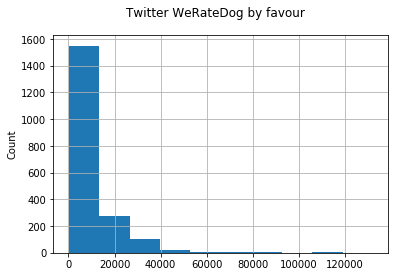

In [138]:
#用户点赞数统计直方图
Twitter_WeRateDog(twitter_master['favourite_count'],'favour')

In [139]:
#整体的转发统计
twitter_master['retweet_count'].describe()

count     1971.000000
mean      2787.830036
std       4739.182501
min         15.000000
25%        627.000000
50%       1362.000000
75%       3224.500000
max      79116.000000
Name: retweet_count, dtype: float64

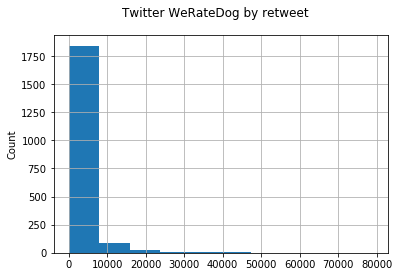

In [140]:
#用户转发数统计直方图
Twitter_WeRateDog(twitter_master['retweet_count'],'retweet')


统计的1971条信息中，平均点赞数是8977，标准偏差std=12456，最小的点赞数是81，最大的是132318， 由直方图可以看出，绝大多数的狗狗点赞数在20000以下；平均转发数是2787，标准偏差std=4739.18，同样的，绝大多数狗狗的转发数在10000以下。那么点赞数超两万的狗狗具备什么特征呢？它们的转发数是否一样居高。

In [141]:
#点赞高于20000
twitter_master_favour_hight=twitter_master[twitter_master['favourite_count']>20000] 

In [142]:
twitter_master_favour_hight['favourite_count'].describe()

count       259.000000
mean      33781.042471
std       17951.492512
min       20002.000000
25%       23087.000000
50%       28187.000000
75%       35844.000000
max      132318.000000
Name: favourite_count, dtype: float64

In [143]:
twitter_master_favour_hight['retweet_count'].describe()

count      259.000000
mean     10534.332046
std       9345.093286
min       3099.000000
25%       5337.500000
50%       7555.000000
75%      11692.500000
max      79116.000000
Name: retweet_count, dtype: float64

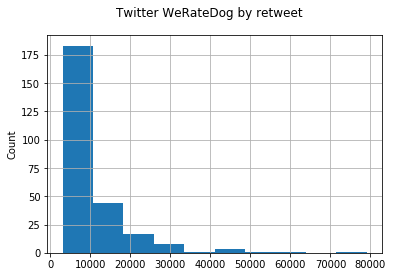

In [144]:
Twitter_WeRateDog(twitter_master_favour_hight['retweet_count'],'retweet')


可以看出，点赞数高于20000的，相应的转发数也高，平均值为10534，标准偏差std=9345，最大值79116。

那么点赞高，转发量跟狗狗的评分是否成正比，WeRateDog的评分是否跟用户的喜好一致

In [145]:
#过滤掉极值
twitter_master_new=twitter_master[twitter_master['rating_numerator']<100]
twitter_master_new=twitter_master_new[twitter_master_new['rating_denominator']==10]

In [146]:
twitter_master_new['rating_numerator'].describe()

count    1957.000000
mean       10.540511
std         2.182353
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

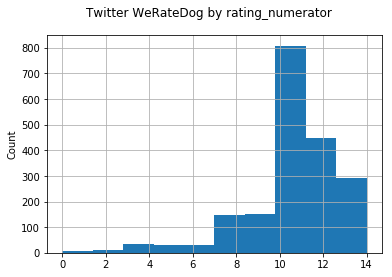

In [147]:
Twitter_WeRateDog(twitter_master_new['rating_numerator'],'rating_numerator')

In [148]:
twitter_master_favour_hight_new=twitter_master_new[twitter_master_new['favourite_count']>20000]
twitter_master_favour_hight_new['rating_numerator'].describe()

count    258.000000
mean      12.415698
std        1.242454
min        0.000000
25%       12.000000
50%       13.000000
75%       13.000000
max       14.000000
Name: rating_numerator, dtype: float64

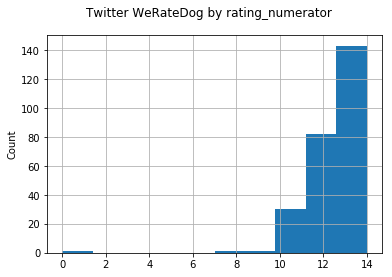

In [149]:
Twitter_WeRateDog(twitter_master_favour_hight_new['rating_numerator'],'rating_numerator')

通过对1957个数据的评分进行统计，发现平均值为10.59，标准偏差std=2.67，评分在11左右分布，比较集中;
其中点赞数超过20000的狗狗的评分平均值为12.64，标准偏差std=4.11，频率分布直方图跟总体的一样，都是集中 分布同一区间，相对点赞数跟转发数来说，这点差别并不明显。可见那么点赞高，转发量跟狗狗的评分不成正比， WeRateDog的评分跟用户的喜好没多大关系。

本次分析的结果是基于所收集的WeRateDog用户档案数据分析得出